<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>Patient Preferences Studies Categorization System</h1>
    <p><b>Gillio Francesco Giuseppe</b></p>
    <p>Seminario Yrigo̱yen César Augusto</b></p>
    <h3>Applied Data Science Project</h3>
    <p><i>Polytechnic University of Turin - Italy</i></p>
</div>

# 1. Data Exploration

In [1]:
import numpy as np
import pandas as pd

**Data Collection**
* Dataset: output of a **Pubmed Search String** on **Patient Preferences Studies**
* URL: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv

In [2]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)
data.head()

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,Label
0,Preferences for disease-related information an...,de Hosson M; De Groote K; Wynendaele H; Mosque...,PURPOSE: The transition towards adult-focused ...,2023,Sep,Eur J Pediatr,182,9,3917-3927,NaN,10.1007/s00431-023-05020-1,37351648,#930,deHosson 2023,NaN,NaN,0
1,Advance Care Planning in South Korea.,Kim YJ; Kim SH,South Korea is an Asian country with a very lo...,2023,Aug,Z Evid Fortbild Qual Gesundhwes,180,NaN,68-73,NaN,10.1016/j.zefq.2023.04.014,37353427,#1010,Kim 2023,NaN,NaN,0
2,Stakeholders' preferences for the design and d...,Vo LK; Allen MJ; Cunich M; Thillainadesan J; M...,This systematic review aimed to synthesise evi...,2024,Jan,Soc Sci Med,340,NaN,116459,NaN,10.1016/j.socscimed.2023.116459,38048738,#513,Vo 2024,NaN,NaN,1
3,Discrete Choice Experiments in Health State Va...,Wang H; Rowen DL; Brazier JE; Jiang L,BACKGROUND: Discrete choice experiments (DCEs)...,2023,May,Appl Health Econ Health Policy,21,3,405-418,NaN,10.1007/s40258-023-00794-9,36997744,#1276,Wang 2023,NaN,NaN,1
4,Improving methods of clinical practice guideli...,Djulbegovic B; Hozo I; Cuker A; Guyatt G,BACKGROUND: Current methods for developing cli...,2023,Dec,J Eval Clin Pract,NaN,NaN,NaN,NaN,10.1111/jep.13953,38073027,#573,Djulbegovic 2023,NaN,NaN,0


**Data Exploration**

1. Extract relevant features from the dataset: `Title, Abstract & Label`

In [3]:
data = data[['Title', 'Abstract', 'Label']]
data.head()

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


2. Assess the `Title Average Length` and the `Abstract Average Lenght` (word count)

In [4]:
data['Title Length'] = data['Title'].astype(str).apply(lambda x: len(x.split()))
data['Abstract Length'] = data['Abstract'].astype(str).apply(lambda x: len(x.split()))

print(f"Average Title Length: {data['Title Length'].mean():.2f} words")
print(f"Average Abstract Length: {data['Abstract Length'].mean():.2f} words")

Average Title Length: 15.16 words
Average Abstract Length: 256.62 words


3. Assess `Anomalies` in the dataset `(non-textual data)`

In [5]:
data['Title Issues'] = data['Title'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)
data['Abstract Issues'] = data['Abstract'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)

print(f"Number of rows with Anomalies in the Title: {data[~data['Title Issues']].shape[0]}")
print(f"Number of rows with Anomalies in the Abstract: {data[~data['Abstract Issues']].shape[0]}")

Number of rows with Anomalies in the Title: 0
Number of rows with Anomalies in the Abstract: 44


*   Filter out rows with `Anomalies`



In [6]:
data = data[data['Title Issues'] & data['Abstract Issues']]

# reset
data.reset_index(drop=True, inplace=True)

data = data[['Title', 'Abstract', 'Label', 'Title Length', 'Abstract Length']]

# check
data.head()

,Title,Abstract,Label,Title Length,Abstract Length
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,18,346
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,6,199
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,18,300
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,15,357
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,21,225


4. Assess `Outliers` in the dataset: row with `Title Length` or `Abstract Length` out of bounds

In [7]:
thresholds = {
    'Title': 1.5 * data['Title Length'].mean(),
    'Abstract': 1.5 * data['Abstract Length'].mean()
    }

# deviation
data['Title Deviation'] = (data['Title Length'] - data['Title Length'].mean()) / data['Title Length'].mean()
data['Abstract Deviation'] = (data['Abstract Length'] - data['Abstract Length'].mean()) / data['Abstract Length'].mean()

outliers = data[(data['Title Length'] > thresholds['Title']) | (data['Abstract Length'] > thresholds['Abstract'])]

print(f"Number of Outliers: {len(outliers)}")
outliers.head()

Number of Outliers: 154


,Title,Abstract,Label,Title Length,Abstract Length,Title Deviation,Abstract Deviation
19,Study protocol of a randomized controlled tria...,BACKGROUND: Treatment of end-stage kidney dise...,0,27,371,0.778034,0.393542
26,Factors Associated With Mode of Separation for...,Palliative Extended and Care at Home (PEACH) i...,0,31,211,1.041446,-0.207446
30,Prospective Six-Month Analysis of Multiarea Bu...,INTRODUCTION: DeRidder burst spinal cord stimu...,0,18,450,0.185356,0.690280
40,Physiotherapists should apply health coaching ...,QUESTIONS: What motivates individuals to start...,0,23,255,0.514622,-0.042174
42,Similar Midterm Outcomes of Total Knee Arthrop...,A small posterior tibial slope (PTS) is genera...,0,24,328,0.580475,0.232027


5. Assess the `Label Distribution` of the dataset

In [8]:
counts = data['Label'].value_counts()
print("Number of documents per Label:")
print(counts)

Number of documents per Label:
Label
0    944
1    227
Name: count, dtype: int64


# 2. Data Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

unito = "#EE1A39"
polito = "#002A5C"

1. `Distribution of Title Lengths`

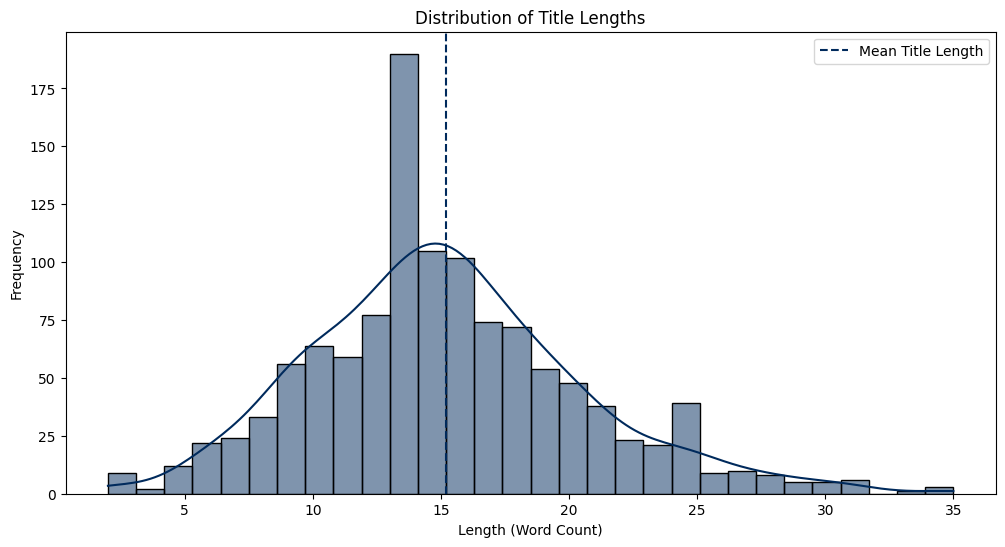

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Title Length'],
             kde=True,
             color=polito,
             bins=30)
plt.axvline(data['Title Length'].mean(),
            color=polito,
            linestyle='dashed',
            linewidth=1.5,
            label='Mean Title Length')
plt.title('Distribution of Title Lengths')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

2. `Distribution of Abstract Lengths`

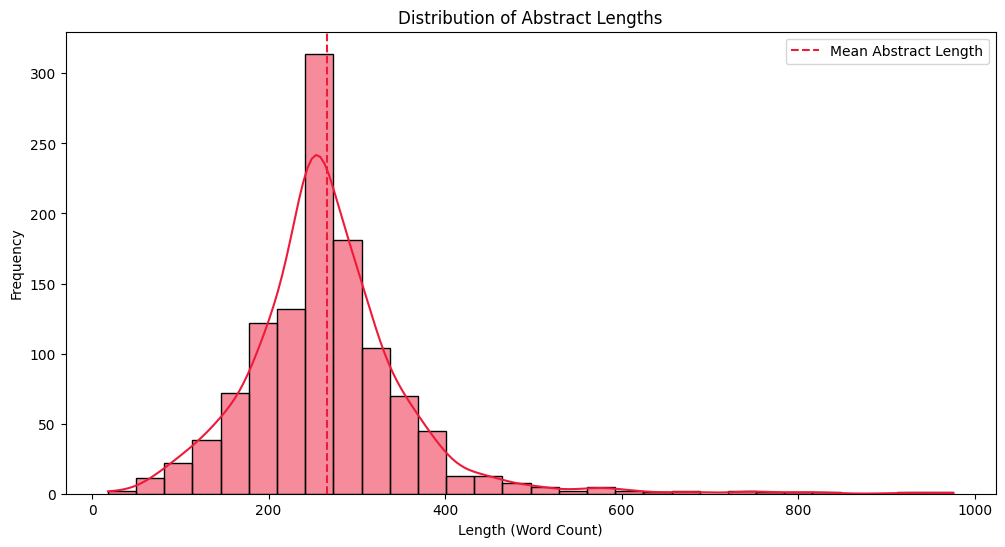

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Abstract Length'],
             kde=True,
             color=unito,
             bins=30)
plt.axvline(data['Abstract Length'].mean(),
            color=unito,
            linestyle='dashed',
            linewidth=1.5,
            label='Mean Abstract Length')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

3. `Boxplot for Title Lengths`

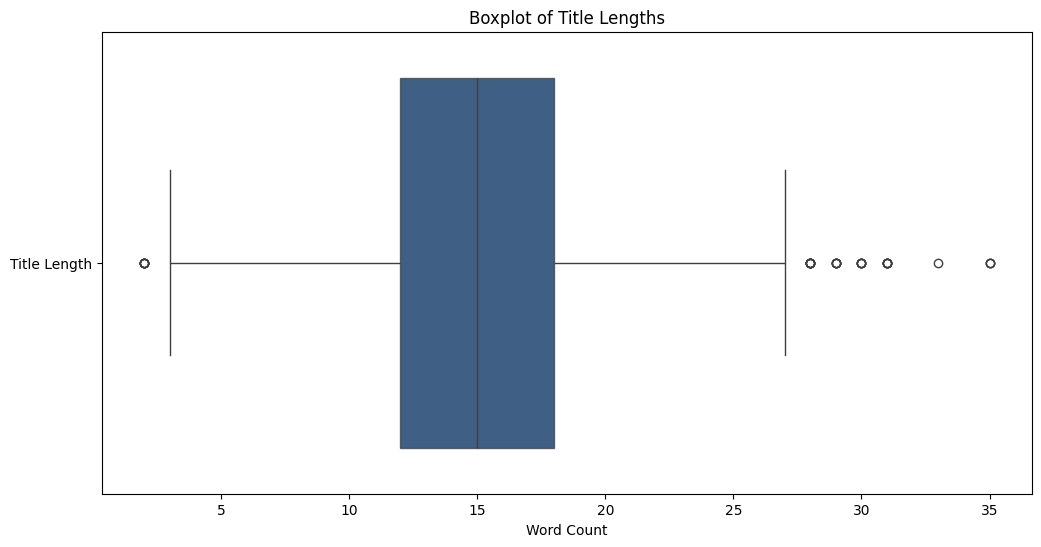

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[['Title Length']],
    orient="h",
    color=polito,
    boxprops=dict(facecolor=polito,
                  alpha=0.75)
)
plt.title("Boxplot of Title Lengths")
plt.xlabel("Word Count")
plt.show()

4. `Boxplot for Abstract Lengths`

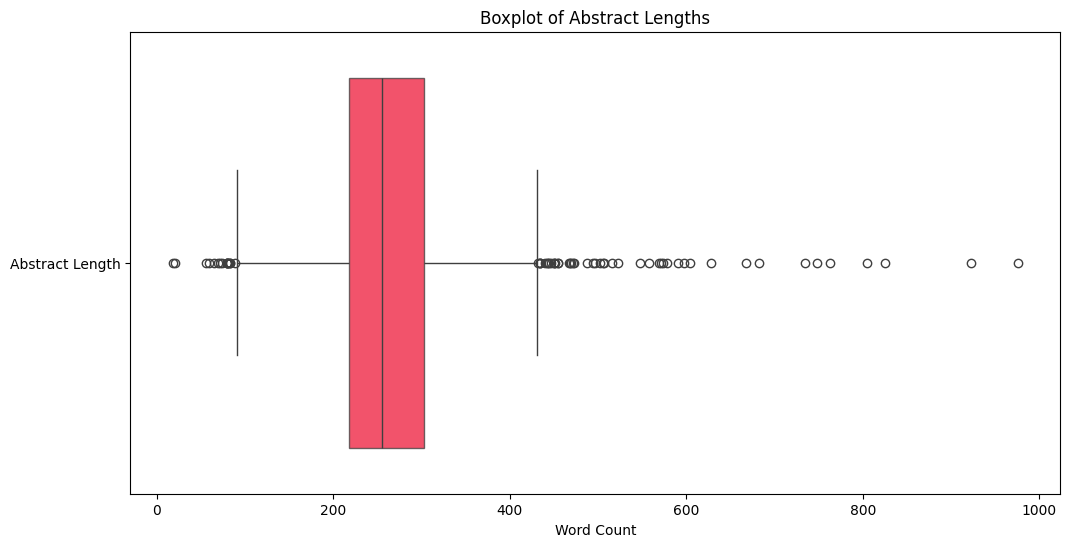

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[['Abstract Length']],
    orient="h",
    color=unito,
    boxprops=dict(facecolor=unito,
                  alpha=0.75)
)
plt.title("Boxplot of Abstract Lengths")
plt.xlabel("Word Count")
plt.show()

5. `Document Count by Label`

<ipython-input-14-69c3c722c795>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


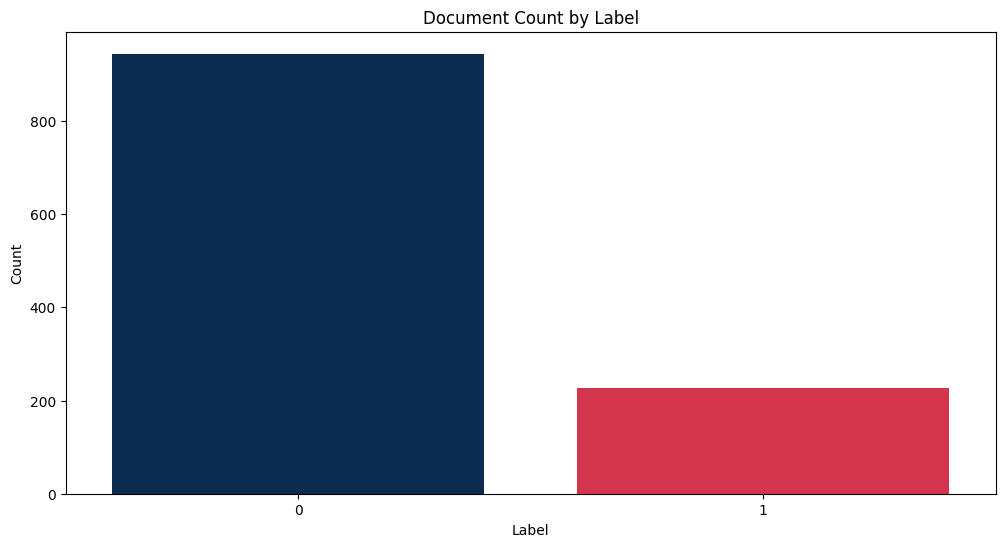

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=[polito, unito]
)
plt.title("Document Count by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

6. `Scatter plot for Outliers`

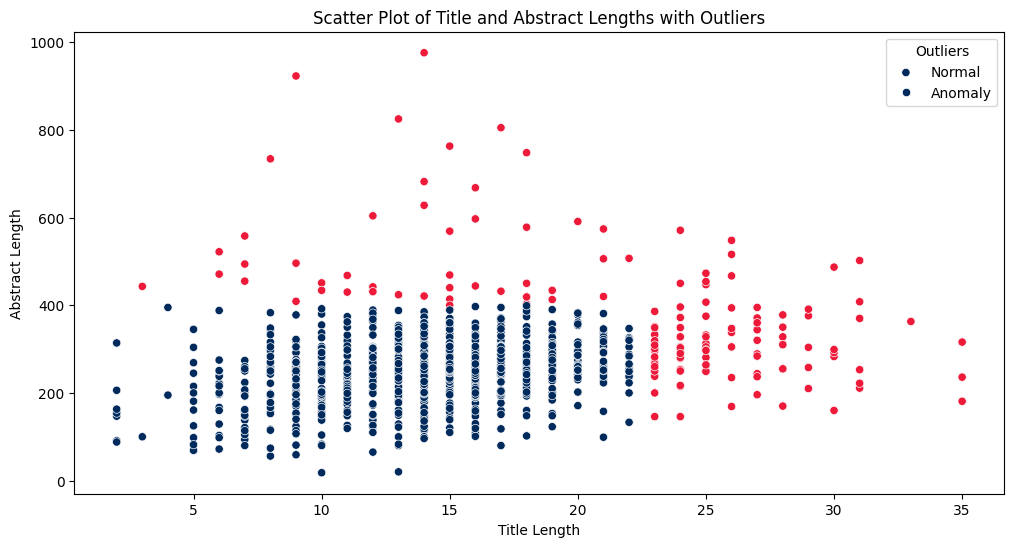

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='Title Length',
    y='Abstract Length',
    hue=(data.index.isin(outliers.index)),
    palette={True: unito,
             False: polito}
)
plt.title("Scatter Plot of Title and Abstract Lengths with Outliers")
plt.xlabel("Title Length")
plt.ylabel("Abstract Length")
plt.legend(title="Outliers", labels=["Normal", "Anomaly"])
plt.show()

# 3. Data Preprocessing

In [16]:
import pandas as pd

**Data Collection**
* Dataset: output of a **Pubmed Search String** on **Patient Preferences Studies**
* URL: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv

In [17]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [18]:
data = data[['Title', 'Abstract', 'Label']]
data.head()

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


In [19]:
row = data.head(1)
row

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0


In [20]:
title = row['Title'].iloc[0]
title

'Preferences for disease-related information and transitional skills among adolescents with congenital heart disease in the early transitional stage.'

In [21]:
abstract = row['Abstract'].iloc[0]
abstract

'PURPOSE: The transition towards adult-focused healthcare comprises a complex process requiring careful, individualized guidance of adolescents with congenital heart disease (CHD). Detailed data on their preferences regarding disease-related information and acquirable transitional skills are mostly lacking. We examined the preferences of CHD adolescents in the early transition stage. METHODS: A cross-sectional descriptive study was performed with adolescents recruited from a transition program. Two questionnaires assessing needs for information and transitional skills were used. Only questionnaires completed in the early transition stage were included. RESULTS: Forty-nine adolescents participated (mean age 15.9\u2009±\u20091.2\xa0years, 43% girls). 59% requested information about their heart and previous and/or future surgeries/interventions, 45% about sports and medication, and a maximum of 27% about psychosocial topics. More girls than boys requested surgical information (76% versus 

**BERT (Bidirectional Encoder Representations from Transformers)**

In [22]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]